<a href="https://colab.research.google.com/github/Titophilip/DataCamp/blob/main/boat_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
boat_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/boat_data.csv')
boat_data.head()

,Currency,Amount,Euro Equivalent,Unnamed: 3,Boat Type,Manufacturer,Type,Conditon,Fuel Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Unnamed: 15
0,EUR,31000000.0,31000000.0,Luxury,Mega Yacht,Majesty Yachts power Boats,"New Boat From Stock,Diesel",New Boat From Stock,Diesel,2020.0,54.4,9.60,NaN,United Kingdom,1009,NaN
1,EUR,24050000.0,24050000.0,Luxury,Mega Yacht,Majesty Yachts power Boats,"New Boat From Stock,Diesel",New Boat From Stock,Diesel,2020.0,47.6,9.60,NaN,United Kingdom,304,NaN
2,EUR,23500000.0,23500000.0,Luxury,Mega Yacht,Benetti power Boats,"Used Boat,Diesel",Used Boat,Diesel,2007.0,56.0,10.40,Steel,Greece,419,NaN
3,EUR,19900000.0,19900000.0,Luxury,Mega Yacht,Bandido Yachts power Boats,"New Boat From Stock,Diesel",New Boat From Stock,Diesel,0.0,45.0,9.50,NaN,Germany,194,NaN
4,DKK,17578125.0,20390625.0,Luxury,Motor Yacht,Greenline power Boats,"New Boat From Stock,Diesel",New Boat From Stock,Diesel,2020.0,20.8,5.45,GRP,Denmark,54,NaN


First, we quickly explore the data.

In [3]:
boat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Currency                     9887 non-null   object 
 1   Amount                       9887 non-null   float64
 2   Euro Equivalent              9887 non-null   float64
 3   Unnamed: 3                   9887 non-null   object 
 4   Boat Type                    9887 non-null   object 
 5   Manufacturer                 8550 non-null   object 
 6   Type                         9881 non-null   object 
 7   Conditon                     9801 non-null   object 
 8   Fuel Type                    7676 non-null   object 
 9   Year Built                   9887 non-null   float64
 10  Length                       9878 non-null   float64
 11  Width                        9831 non-null   float64
 12  Material                     8138 non-null   object 
 13  Location          

In [4]:
boat_data.describe()

,Amount,Euro Equivalent,Year Built,Length,Width,Number of views last 7 days,Unnamed: 15
count,9.887000e+03,9.887000e+03,9887.000000,9878.000000,9831.000000,9888.000000,1.0
mean,3.201597e+05,3.046250e+05,1893.180338,11.570480,3.520228,149.149575,108.0
std,1.007531e+06,9.962085e+05,460.223172,6.002947,1.220553,151.815659,NaN
min,3.300000e+03,6.721000e+02,0.000000,1.040000,0.010000,13.000000,108.0
25%,4.400000e+04,4.158300e+04,1996.000000,7.470000,2.540000,70.000000,108.0
50%,9.500000e+04,9.000000e+04,2007.000000,10.280000,3.330000,108.000000,108.0
75%,2.550000e+05,2.450000e+05,2017.000000,13.930000,4.250000,172.000000,108.0
max,3.100000e+07,3.100000e+07,2021.000000,100.000000,25.160000,3263.000000,108.0


In [8]:
sns.set_theme('notebook')

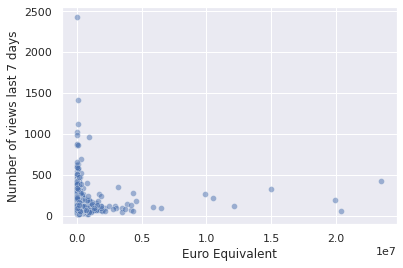

In [9]:
np.random.seed(43)

sample = boat_data.sample(n=1000)

sns.scatterplot(x='Euro Equivalent', y='Number of views last 7 days', data=sample, alpha=0.5)
plt.show()

In [10]:
correlation = boat_data['Euro Equivalent'].corr(boat_data['Number of views last 7 days'])
print(correlation)

-0.01439569910416975


In [11]:
sample['sqrt Euro Equivalent'] = np.sqrt(sample['Euro Equivalent'])
sample['sqrt Number of views'] = np.sqrt(sample['Number of views last 7 days'])

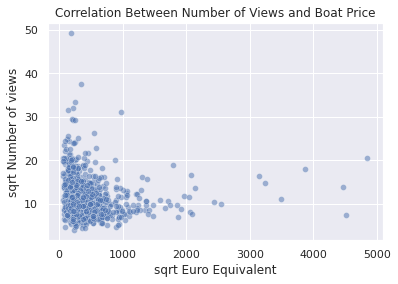

In [12]:
sns.scatterplot(data= sample, x='sqrt Euro Equivalent', y='sqrt Number of views', alpha=0.5)
plt.title('Correlation Between Number of Views and Boat Price')
plt.show()

In [13]:
correlation_sqrt = sample['sqrt Euro Equivalent'].corr(sample['sqrt Number of views'])
print(correlation_sqrt)

-0.07837694225745984


Let's say boats that are viewed, at least, 100 times on average daily are boats with high views.

So, we subset to see boats with 700 views or more in the last 7 days.

In [14]:
most_viewed = boat_data[boat_data['Number of views last 7 days'] >= 700].sort_values('Number of views last 7 days', ascending=False)
most_viewed.head()

,Currency,Amount,Euro Equivalent,Unnamed: 3,Boat Type,Manufacturer,Type,Conditon,Fuel Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Unnamed: 15
9123,CHF,14900.0,15347.0,Cheap,Motor Yacht,Bayliner power Boats,"Used Boat,Unleaded",Used Boat,Unleaded,1992.0,7.70,2.46,Plastic,Switzerland,3263,NaN
7502,CHF,35000.0,36050.0,Cheap,Hardtop,Princess power Boats,"Used Boat,Diesel",Used Boat,Diesel,1979.0,11.12,3.88,GRP,Switzerland,2432,NaN
3729,CHF,125900.0,129677.0,Moderate,"Bowrider, Motor Yacht, Sport Boat",Windy power Boats,"Used Boat,Diesel",Used Boat,Diesel,2002.0,12.35,3.48,GRP,Switzerland,2261,NaN
559,EUR,949000.0,949000.0,Luxury,Hardtop,Pershing power Boats,"Used Boat,Diesel",Used Boat,Diesel,2009.0,20.30,5.20,GRP,Germany,2154,NaN
8732,CHF,19900.0,20497.0,Cheap,Sport Boat,Sea Ray power Boats,"Used Boat,Unleaded",Used Boat,Unleaded,1993.0,6.14,2.34,Plastic,Switzerland,2026,NaN


In [15]:
sns.set_context('notebook')

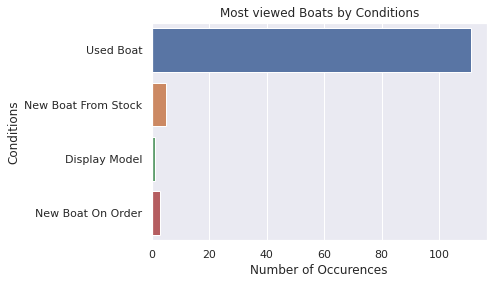

<Figure size 432x288 with 0 Axes>

In [19]:
sns.countplot(data=most_viewed, y='Conditon')
plt.title('Most viewed Boats by Conditions')
plt.xlabel('Number of Occurences')
plt.ylabel('Conditions')
plt.show()
plt.savefig('Most viewed Boats by Conditions.png');

In [17]:
fuel_type = most_viewed['Fuel Type'].value_counts()
fuel_type


Unleaded    72
Diesel      41
Name: Fuel Type, dtype: int64

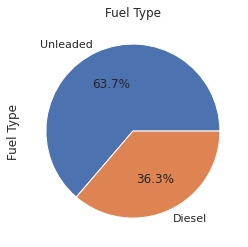

<Figure size 432x288 with 0 Axes>

In [18]:
bar = ['Unleaded', 'Diesel']
fuel_type.plot(kind='pie', labels = bar,autopct='%1.1f%%')
plt.title('Fuel Type')
plt.show()
plt.savefig('Most viewed Boats by Fuel Type.png')

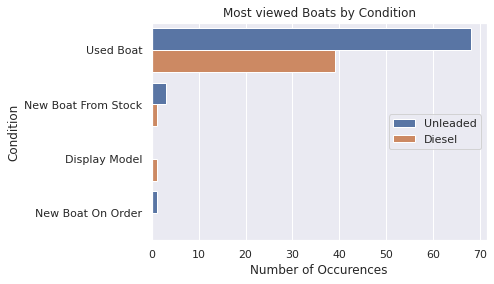

<Figure size 432x288 with 0 Axes>

In [20]:
sns.countplot(data=most_viewed, y='Conditon', hue='Fuel Type')
plt.title('Most viewed Boats by Condition')
plt.xlabel('Number of Occurences')
plt.ylabel('Condition')
plt.legend(loc='right')
plt.show()
plt.savefig('Most viewed Boats by Condition and Fuel Type.png')

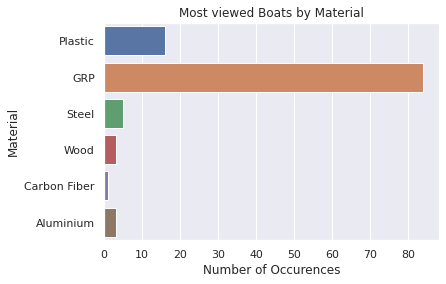

<Figure size 432x288 with 0 Axes>

In [21]:
sns.countplot(data=most_viewed, y='Material')
plt.title('Most viewed Boats by Material')
plt.xlabel('Number of Occurences')
plt.ylabel('Material')
plt.show()
plt.savefig('Most viewed Boats by Material.png')

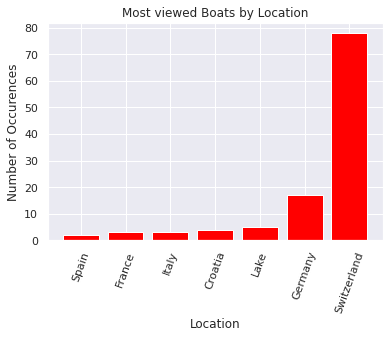

<Figure size 432x288 with 0 Axes>

In [22]:
most_viewed_locations = most_viewed.Location.value_counts().to_frame()
most_viewed_locations.reset_index(inplace=True)
most_viewed_locations.columns = ['Location', 'Number of Occurences']
most_viewed_locations = most_viewed_locations[most_viewed_locations['Number of Occurences'] > 1].sort_values('Number of Occurences', ascending=True)
plt.bar(x=most_viewed_locations['Location'], height=most_viewed_locations['Number of Occurences'], color='red')
plt.title('Most viewed Boats by Location')
plt.ylabel('Number of Occurences')
plt.xticks(rotation=70)
plt.xlabel('Location')
plt.show()
plt.savefig('Most viewed Boats by Location.png')

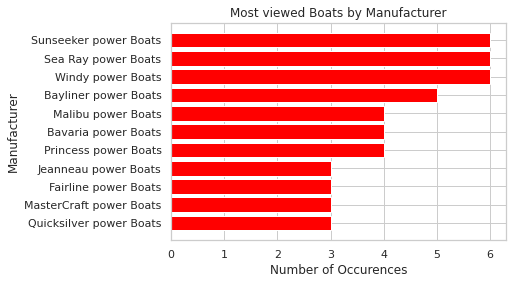

<Figure size 432x288 with 0 Axes>

In [23]:
sns.set_style('whitegrid')
most_viewed_manufacturers = most_viewed.Manufacturer.value_counts().to_frame()
most_viewed_manufacturers.reset_index(inplace=True)
most_viewed_manufacturers.columns = ['Manufacturer', 'Number of Occurences']
most_viewed_manufacturers = most_viewed_manufacturers[most_viewed_manufacturers['Number of Occurences'] > 2].sort_values('Number of Occurences', ascending=True)
plt.barh(y=most_viewed_manufacturers['Manufacturer'], width=most_viewed_manufacturers['Number of Occurences'], color='red')
plt.title('Most viewed Boats by Manufacturer')
plt.xlabel('Number of Occurences')
# plt.xticks(rotation=70)
plt.ylabel('Manufacturer')
plt.show()
plt.savefig('Most viewed Boats by Manufacturer.png')

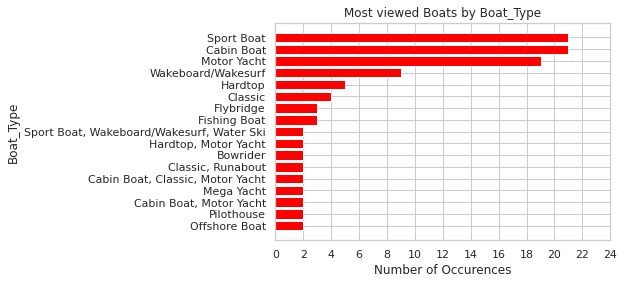

<Figure size 432x288 with 0 Axes>

In [24]:
sns.set_context('notebook')
most_viewed_Boat_Types = most_viewed['Boat Type'].value_counts().to_frame()
most_viewed_Boat_Types.reset_index(inplace=True)
most_viewed_Boat_Types.columns = ['Boat Type', 'Number of Occurences']
most_viewed_Boat_Types = most_viewed_Boat_Types[most_viewed_Boat_Types['Number of Occurences'] > 1].sort_values('Number of Occurences', ascending=True)
plt.barh(y=most_viewed_Boat_Types['Boat Type'], width=most_viewed_Boat_Types['Number of Occurences'], color='red')
plt.title('Most viewed Boats by Boat_Type')
plt.xlabel('Number of Occurences')
plt.xticks(np.arange(0, 26, 2))
plt.ylabel('Boat_Type')
plt.show()
plt.savefig('Most viewed Boats by Type.png')

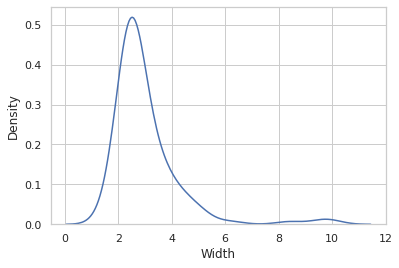

In [25]:
sns.kdeplot(data=most_viewed, x='Width')
plt.show()